In [63]:
#!pip install pandas
#!pip install scikit-learn
#!pip install matplotlib
#!pip install seaborn
#! pip install scipy
#!pip install openpyxl
#!pip install tabulate
#!pip install xlsxwriter
#!pip install dataframe_image reportlab
#!pip install mpld3
#!pip install bokeh

## Read the dataset and convert it as pandas dataframe

# Data Preprocessing

#### Data Cleaning: Data cleaning involves removing noise, errors, and irrelevant information from the raw HTTP traffic data. This step ensures the quality and reliability of the data used for anomaly detection. Common data cleaning techniques include removing duplicates, handling missing values, and correcting inconsistencies in the data.


In [49]:
# Handling missing values
df.dropna(inplace=True)

# Removing duplicates
df.drop_duplicates(inplace=True)

# Handling outliers (example: removing rows with very large values in 'src_bytes')
df['src_bytes'] = pd.to_numeric(df['src_bytes'], errors='coerce')
threshold = 1e6
df = df.loc[df['src_bytes'] < threshold, :]

# Print the cleaned DataFrame
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,86,255,1.00,0.00,0.01,0.05,0.00,0.01,0.00,0.00
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,6,255,1.00,0.00,0.17,0.05,0.00,0.01,0.00,0.00
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,16,255,1.00,0.00,0.06,0.05,0.06,0.01,0.00,0.00
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,26,255,1.00,0.00,0.04,0.05,0.04,0.01,0.00,0.00


#### Data Normalization: Data normalization is the process of scaling the numerical features of the HTTP traffic data to a standard range. This step is crucial for ensuring that features with different scales or units have equal importance in the anomaly detection process. Common normalization techniques include min-max scaling, z-score normalization, and decimal scaling.

In [57]:
from sklearn.preprocessing import MinMaxScaler

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Perform Min-Max scaling on the selected columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Print the normalized DataFrame
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,0.000253,5450,0,0,0,0,...,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00
1,0,tcp,http,SF,0.000334,486,0,0,0,0,...,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00
2,0,tcp,http,SF,0.000329,1337,0,0,0,0,...,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00
3,0,tcp,http,SF,0.000306,1337,0,0,0,0,...,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00
4,0,tcp,http,SF,0.000303,2032,0,0,0,0,...,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,0.000433,1881,0,0,0,0,...,86,255,1.00,0.00,0.01,0.05,0.00,0.01,0.00,0.00
494017,0,tcp,http,SF,0.000394,2286,0,0,0,0,...,6,255,1.00,0.00,0.17,0.05,0.00,0.01,0.00,0.00
494018,0,tcp,http,SF,0.000284,1200,0,0,0,0,...,16,255,1.00,0.00,0.06,0.05,0.06,0.01,0.00,0.00
494019,0,tcp,http,SF,0.000407,1200,0,0,0,0,...,26,255,1.00,0.00,0.04,0.05,0.04,0.01,0.00,0.00


##### Handling Categorical Features: HTTP traffic data may contain categorical features, such as HTTP methods (GET, POST, etc.) or status codes (200, 404, etc.). To effectively use these features in anomaly detection, they need to be encoded into numerical representations. Techniques such as one-hot encoding or label encoding can be applied to convert categorical features into a suitable format for analysis.

In [58]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Print the encoded DataFrame
df_encoded

,src_bytes,duration_0,duration_1,duration_10,duration_100,duration_10015,duration_10028,duration_10031,duration_10039,duration_1007,...,dst_host_srv_rerror_rate_0.91,dst_host_srv_rerror_rate_0.92,dst_host_srv_rerror_rate_0.93,dst_host_srv_rerror_rate_0.94,dst_host_srv_rerror_rate_0.95,dst_host_srv_rerror_rate_0.96,dst_host_srv_rerror_rate_0.97,dst_host_srv_rerror_rate_0.98,dst_host_srv_rerror_rate_0.99,dst_host_srv_rerror_rate_1.00
0,0.000253,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.000334,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.000329,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.000306,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.000303,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0.000433,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
494017,0.000394,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
494018,0.000284,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
494019,0.000407,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### Dimensionality Reduction: Dimensionality reduction techniques aim to reduce the number of features in the HTTP traffic data while preserving important information. This helps alleviate the curse of dimensionality and improve the efficiency and effectiveness of anomaly detection algorithms. Common dimensionality reduction techniques include Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), and t-distributed Stochastic Neighbor Embedding (t-SNE).

In [62]:
from sklearn.decomposition import PCA

# Select numerical columns for dimensionality reduction
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns]

# Determine the number of components
n_components = min(df_numerical.shape[0], df_numerical.shape[1])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_numerical)

# Create a new DataFrame with the reduced dimensions
df_reduced = pd.DataFrame(data=df_pca, columns=[f"PC{i+1}" for i in range(n_components)])

# Print the reduced DataFrame
df_reduced

,PC1
0,-0.000851
1,-0.000770
2,-0.000775
3,-0.000798
4,-0.000801
...,...
145495,-0.000670
145496,-0.000710
145497,-0.000820
145498,-0.000697


In [ ]:
import shap
import numpy as np
from sklearn.cluster import KMeans

# Fit an unsupervised model (e.g., K-means clustering)
model = KMeans(n_clusters=3)
model.fit(df)

# Initialize the explainer with the unsupervised model
explainer = shap.Explainer(model.predict, df)

# Compute Shapley values for each feature
shap_values = explainer(df)

# Calculate the feature importance by taking the mean absolute Shapley value across instances
feature_importance = np.mean(np.abs(shap_values.values), axis=0)

# Sort the feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

# Print the variable importance
for i, feature_index in enumerate(sorted_indices):
    feature_name = f"Feature {feature_index}"
    importance = feature_importance[feature_index]
    print(f"{i+1}. {feature_name}: {importance}")

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data_filename = "kddcup.data_10_percent.txt"
names_filename = "kddcup.names"
num_columns = 10

# Read the kddcup.names file to extract the column names
with open(names_filename, "r") as names_file:
    lines = names_file.readlines()
    column_lines = [line.strip() for line in lines if ":" in line]
    column_names = [line.split(":")[0] for line in column_lines]

data = []

with open(data_filename, "r") as file:
    for line in file:
        try:
            # Split the line into individual values
            values = line.strip().split(",")
            
            # Append only the first 42 values to the data list
            data.append(values[:num_columns])
        except Exception as e:
            # Skip the error line and continue to the next line
            print(f"Error: {e}. Skipping line: {line}")
            continue

# Create a DataFrame from the data list with only the first 42 columns
df = pd.DataFrame(data)
df.columns = column_names[:num_columns]

# Display the first 5 rows
print(df.head())

  duration protocol_type service flag src_bytes dst_bytes land wrong_fragment  \
0        0           tcp    http   SF       181      5450    0              0   
1        0           tcp    http   SF       239       486    0              0   
2        0           tcp    http   SF       235      1337    0              0   
3        0           tcp    http   SF       219      1337    0              0   
4        0           tcp    http   SF       217      2032    0              0   

  urgent hot  
0      0   0  
1      0   0  
2      0   0  
3      0   0  
4      0   0  


In [5]:
# Summary Statistics
df.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot
count,494021,494021,494021,494021,494021,494021,494021,494021,494021,494021
unique,2495,3,66,11,3300,10725,2,3,4,22
top,0,icmp,ecr_i,SF,1032,0,0,0,0,0
freq,481671,283602,281400,378439,228035,408259,493999,492783,494017,490829


  duration  protocol_type  service  flag src_bytes dst_bytes land  \
0        0              1       22     9       181      5450    0   
1        0              1       22     9       239       486    0   
2        0              1       22     9       235      1337    0   
3        0              1       22     9       219      1337    0   
4        0              1       22     9       217      2032    0   

  wrong_fragment urgent hot  
0              0      0   0  
1              0      0   0  
2              0      0   0  
3              0      0   0  
4              0      0   0  
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot'],
      dtype='object')


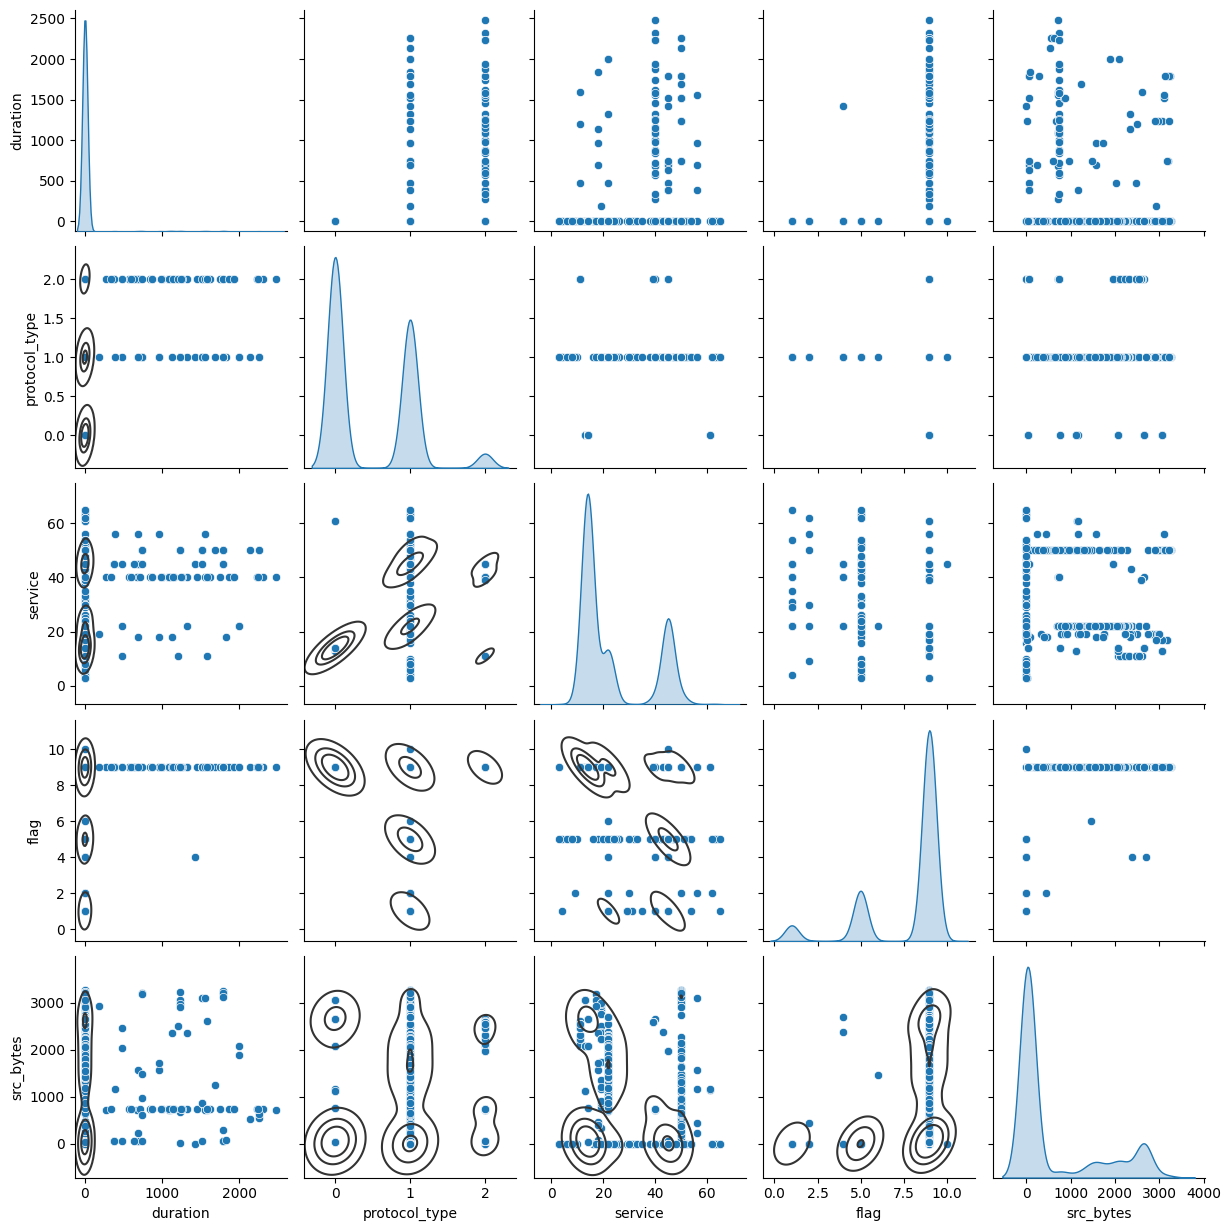

In [12]:
# Display the first 5 rows
print(df.head())

print(df.columns)

# Label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Assuming that columns 1, 2, 3 are categorical 
for col in ['duration', 'protocol_type', 'service', 'flag', 'src_bytes']:
    df[col] = le.fit_transform(df[col])
    
# Select only numerical columns
numerical_cols = df.select_dtypes(include=[np.number])

# Now let's plot with pairplot
g = sns.pairplot(numerical_cols.sample(frac=0.01), diag_kind="kde")  # Plot a fraction for efficiency
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

  duration protocol_type service flag src_bytes dst_bytes land wrong_fragment  \
0        0           tcp    http   SF       181      5450    0              0   
1        0           tcp    http   SF       239       486    0              0   
2        0           tcp    http   SF       235      1337    0              0   
3        0           tcp    http   SF       219      1337    0              0   
4        0           tcp    http   SF       217      2032    0              0   

  urgent hot  
0      0   0  
1      0   0  
2      0   0  
3      0   0  
4      0   0  


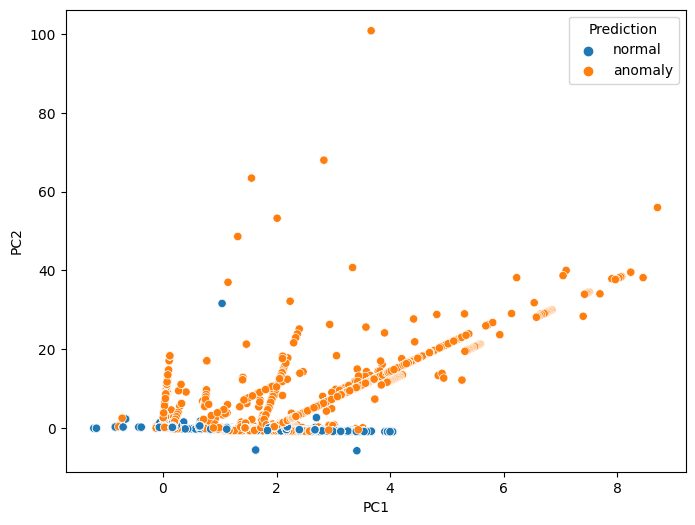

Silhouette score: 0.6493426193099446


In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first 5 rows
print(df.head())

# Create LabelEncoder instance
le = LabelEncoder()

# Assuming that columns 1 (protocol_type), 2 (service), and 3 (flag) are categorical
categorical_cols = ['protocol_type', 'service', 'flag']

# Check if those columns exist in the dataframe
for col in categorical_cols:
    if col not in df.columns:
        print(f'Column {col} does not exist in the dataframe')
    else:
        # Perform label encoding
        df[col] = le.fit_transform(df[col])

# Normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Isolation Forest Model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Assuming 5% of the data are anomalies
iso_forest.fit(df_scaled)

# Predictions (1 for inliers, -1 for outliers)
predictions = iso_forest.predict(df_scaled)

# Map the predictions back to their original labels (-1 for anomalies, 1 for normal observations)
predictions_mapped = ["anomaly" if prediction == -1 else "normal" for prediction in predictions]

# Visualize the anomalies vs normal data after PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df["Prediction"] = predictions_mapped

plt.figure(figsize=(8, 6))
sns.scatterplot(data=principal_df, x="PC1", y="PC2", hue="Prediction")
plt.show()

# Scoring
score = silhouette_score(df_scaled, predictions)
print(f'Silhouette score: {score}')